In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
order = ["BBKNN", "Scanorama", "fastMNN", "scVI", "VIPCCA", "Online iNMF", "Seurat", "Harmony", "Portal"]

In [3]:
kbet_score = np.array([0.185, 0.097, 0.351, 0.001, 0.9195, 0.8985, 0.636, 0.607, 0.941])
kbet_rank = scipy.stats.rankdata(kbet_score, method='min')
kbet_rank = 10 - kbet_rank # larger is better

ilisi_score = np.array([0.000585, 0.022391, 0.133132, 0.102212, 0.267693, 0.198368, 0.258195, 0.14534, 0.255824])
ilisi_rank = scipy.stats.rankdata(ilisi_score, method='min')
ilisi_rank = 10 - ilisi_rank # larger is better

pcr_score = np.array([0.671196, 0.621043, 0.977809, 0.994272, 0.995944, 0.997139, 0.993321, 0.998409, 0.996014])
pcr_rank = scipy.stats.rankdata(pcr_score, method='min')
pcr_rank = 10 - pcr_rank # larger is better

batch_asw_score = np.array([0.378409, 0.4280735, 0.47885, 0.4056305, 0.4937195, 0.5251145, 0.5058415, 0.492221, 0.5054425])
batch_asw_rank = scipy.stats.rankdata(batch_asw_score, method='min')
batch_asw_rank = 10 - batch_asw_rank # larger is better

gconn_score = np.array([0.927946, 0.967705, 0.987162, 0.979829, 0.972187, 0.978945, 0.979144, 0.979182, 0.980028])
gconn_rank = scipy.stats.rankdata(gconn_score, method='min')
gconn_rank = 10 - gconn_rank # larger is better

ari_score = np.array([0.05555, 0.198669, 0.212494, 0.198655, 0.078371, 0.167216, 0.184786, 0.213591, 0.351073])
ari_rank = scipy.stats.rankdata(ari_score, method='min')
ari_rank = 10 - ari_rank # larger is better
                     
nmi_score = np.array([0.341581, 0.454461, 0.464057, 0.443687, 0.379208, 0.448948, 0.450711, 0.458651, 0.492576])
nmi_rank = scipy.stats.rankdata(nmi_score, method='min')
nmi_rank = 10 - nmi_rank # larger is better

asw_score = np.array([0.419558, 0.215414, 0.414396, 0.094833, 0.33863, 0.363257, 0.429482, 0.462064, 0.464374]) / 2 + 0.5
asw_rank = scipy.stats.rankdata(asw_score, method='min')
asw_rank = 10 - asw_rank # larger is better
                     
clisi_score = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1.])
clisi_rank = scipy.stats.rankdata(clisi_score, method='min')
clisi_rank = 10 - clisi_rank # larger is better
                     
isof1_score = np.array([0.926338, 0.868496, 0.904455, 0.897748, 0.926986, 0.821378, 0.924538, 0.929152, 0.929152])
isof1_rank = scipy.stats.rankdata(isof1_score, method='min')
isof1_rank = 10 - isof1_rank # larger is better
                     
isoasw_score = np.array([0.655872, 0.606712, 0.641232, 0.57915, 0.714546, 0.82062, 0.798207, 0.774945, 0.784666])
isoasw_rank = scipy.stats.rankdata(isoasw_score, method='min')
isoasw_rank = 10 - isoasw_rank # larger is better
                     
cc_score = np.array([0.152588, 0.157718, 0.285003, 0.40949, 0.399832, 0.483516, 0.124312, 0.527718, 0.427455])
cc_rank = scipy.stats.rankdata(cc_score, method='min')
cc_rank = 10 - cc_rank # larger is better

In [4]:
batch_correct_score = (kbet_score + ilisi_score + pcr_score + batch_asw_score + gconn_score) / 5
batch_correct_rank = scipy.stats.rankdata(batch_correct_score, method='min')
batch_correct_score = np.clip(batch_correct_score, a_max = None, a_min = 0.001)
batch_correct_rank = 10 - batch_correct_rank # larger is better

bio_conserve_score = (ari_score + nmi_score + asw_score + 
    clisi_score + isof1_score + isoasw_score + cc_score) / 7
bio_conserve_rank = scipy.stats.rankdata(bio_conserve_score, method='min')
bio_conserve_score = np.clip(bio_conserve_score, a_max = None, a_min = 0.001)
bio_conserve_rank = 10 - bio_conserve_rank # larger is better

overall_score = (batch_correct_score * 0.4 + bio_conserve_score * 0.6)
overall_rank = scipy.stats.rankdata(overall_score, method='min')
overall_score = np.clip(overall_score, a_max = None, a_min = 0.001)
overall_rank = 10 - overall_rank # larger is better

([<matplotlib.axis.XTick at 0x7f83515e4450>,
 [Text(-3.5, 0, 'Overall score'),
  Text(-1.5, 0, 'Overall score\n(Batch correction)'),
  Text(5.5, 0, 'Overall score\n(Conservation of\nbiological variation)'),
  Text(0.0, 0, 'kBET'),
  Text(1.0, 0, 'Graph iLISI'),
  Text(2.0, 0, 'PCR batch'),
  Text(3.0, 0, 'Batch ASW'),
  Text(4.0, 0, 'Graph\nconnectivity'),
  Text(7.0, 0, 'ARI'),
  Text(8.0, 0, 'NMI'),
  Text(9.0, 0, 'Cell type ASW'),
  Text(10.0, 0, 'Graph cLISI'),
  Text(11.0, 0, 'Isolated label\nF1'),
  Text(12.0, 0, 'Isloated label\nsilhouette'),
  Text(13.0, 0, 'Cell cycle\nconservation')])

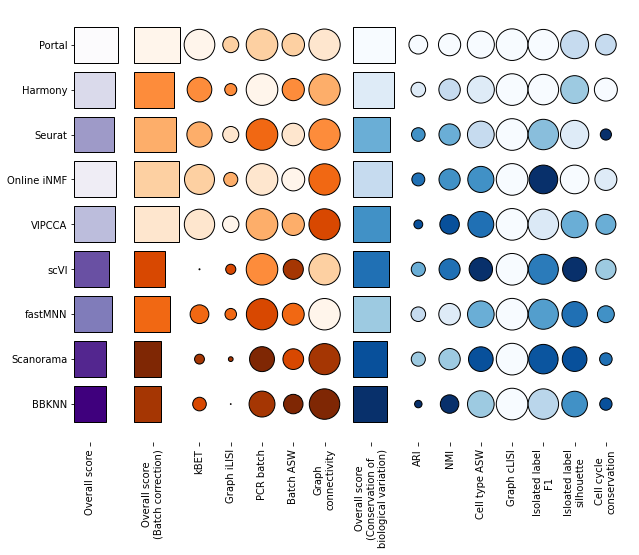

In [5]:
plt.figure(figsize=(10,8))

plotsize = 1000
plt.box(False)

plt.scatter(np.zeros(9), order, s=kbet_score * plotsize, c = kbet_rank, cmap="Oranges", edgecolors="black")
plt.scatter(np.zeros(9) + 1, order, s=ilisi_score * plotsize, c = ilisi_rank, cmap="Oranges", edgecolors="black")
plt.scatter(np.zeros(9) + 2, order, s=pcr_score * plotsize, c = pcr_rank, cmap="Oranges", edgecolors="black")
plt.scatter(np.zeros(9) + 3, order, s=batch_asw_score * plotsize, c = batch_asw_rank, cmap="Oranges", edgecolors="black")
plt.scatter(np.zeros(9) + 4, order, s=gconn_score * plotsize, c = gconn_rank, cmap="Oranges", edgecolors="black")
plt.scatter(np.zeros(9) + 7, order, s=ari_score * plotsize, c = ari_rank, cmap="Blues", edgecolors="black")
plt.scatter(np.zeros(9) + 8, order, s=nmi_score * plotsize, c = nmi_rank, cmap="Blues", edgecolors="black")
plt.scatter(np.zeros(9) + 9, order, s=asw_score * plotsize, c = asw_rank, cmap="Blues", edgecolors="black")
plt.scatter(np.zeros(9) + 10, order, s=clisi_score * plotsize, c = clisi_rank, cmap="Blues", edgecolors="black")
plt.scatter(np.zeros(9) + 11, order, s=isof1_score * plotsize, c = isof1_rank, cmap="Blues", edgecolors="black")
plt.scatter(np.zeros(9) + 12, order, s=isoasw_score * plotsize, c = isoasw_rank, cmap="Blues", edgecolors="black")
plt.scatter(np.zeros(9) + 13, order, s=cc_score * plotsize, c = cc_rank, cmap="Blues", edgecolors="black")

batch_cmap = plt.get_cmap("Oranges")
bio_cmap = plt.get_cmap("Blues")
overall_cmap = plt.get_cmap("Purples")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.barh(order, left=-2-0.1, width=batch_correct_score * 2, color=batch_cmap(rescale(batch_correct_rank)), edgecolor="black")
plt.barh(order, left=5-0.1, width=bio_conserve_score * 2, color=bio_cmap(rescale(bio_conserve_rank)), edgecolor="black")
plt.barh(order, left=-4, width=overall_score * 2, color=overall_cmap(rescale(overall_rank)), edgecolor="black")


plt.xticks([-3.5, -1.5, 5.5, 
    0, 1, 2, 3, 4, 
    7, 8, 9, 10, 11, 12, 13], 
    ['Overall score', 'Overall score\n(Batch correction)', 'Overall score\n(Conservation of\nbiological variation)',
    'kBET', 'Graph iLISI', 'PCR batch', 'Batch ASW', 'Graph\nconnectivity', 
    'ARI', 'NMI', 'Cell type ASW', 'Graph cLISI', 'Isolated label\nF1', 'Isloated label\nsilhouette',
    'Cell cycle\nconservation'], 
    rotation="90")